In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
path="/lustre/ytzheng/"
Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_warm2.6'

f = xr.open_mfdataset(path + Casename + '/' +  '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [13]:
f

<xarray.Dataset>
Dimensions:               (time: 90, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 168.72917
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    PREC                  (time) float32 dask.array<chunksize=(90,), me

In [23]:
print(f['time'].values)

[165.02083 165.0625  165.10417 165.14583 165.1875  165.22917 165.27083
 165.3125  165.35417 165.39583 165.4375  165.47917 165.52083 165.5625
 165.60417 165.64583 165.6875  165.72917 165.77083 165.8125  165.85417
 165.89583 165.9375  165.97917 166.02083 166.0625  166.10417 166.14583
 166.1875  166.22917 166.27083 166.3125  166.35417 166.39583 166.4375
 166.47917 166.52083 166.5625  166.60417 166.64583 166.6875  166.72917
 166.77083 166.8125  166.85417 166.89583 166.9375  166.97917 167.02083
 167.0625  167.10417 167.14583 167.1875  167.22917 167.27083 167.3125
 167.35417 167.39583 167.4375  167.47917 167.52083 167.5625  167.60417
 167.64583 167.6875  167.72917 167.77083 167.8125  167.85417 167.89583
 167.9375  167.97917 168.02083 168.0625  168.10417 168.14583 168.1875
 168.22917 168.27083 168.3125  168.35417 168.39583 168.4375  168.47917
 168.52083 168.5625  168.60417 168.64583 168.6875  168.72917]


In [3]:
myfontsize = 12
cadvc = 'dodgerblue'
wadvc = 'crimson'

In [4]:
def pltbudget(ax, z, tur, sub, lat, rad, zcb,
              xtitle = "$h_L$ tend.",
              xrange = [-10., 10],
              doqt = 0,
              dolegend = 1):
    
    ax.plot(tur, z, label = 'TUR')
    ax.plot(sub, z, label = 'SUB')
    if doqt == 0:
        ax.plot(lat, z, label = 'LAT')
        ax.plot(rad, z, label = 'RAD')
    else:
        ax.plot(lat, z, label = 'SINK')
        ax.plot(rad, z, label = 'SRC')        
    ax.plot(tur+sub+lat+rad, z, label = 'TOT', color = 'black')

    ax.axhline(y=zcb, linestyle='--',color = 'black')

    ax.set_xlabel(xtitle, fontsize=myfontsize)    
    ax.set_ylabel("Normalized height", fontsize=myfontsize) 
    ax.set_ylim([0., 1.2])
    ax.set_xlim(xrange)
    ax.grid(True)
    
    if dolegend == 1:
        ax.legend(loc="lower left", fontsize=0.8*myfontsize)

In [5]:
def setax(ax, zcb, xtitle = '', color = 'black'):
    ax.axhline(y=zcb, linestyle='--',color = color)  
    ax.set_ylabel("Normalized height", fontsize=myfontsize) 
    ax.set_xlabel(xtitle, fontsize=myfontsize) 
    ax.set_ylim([0., 1.2])
    ax.grid(True)

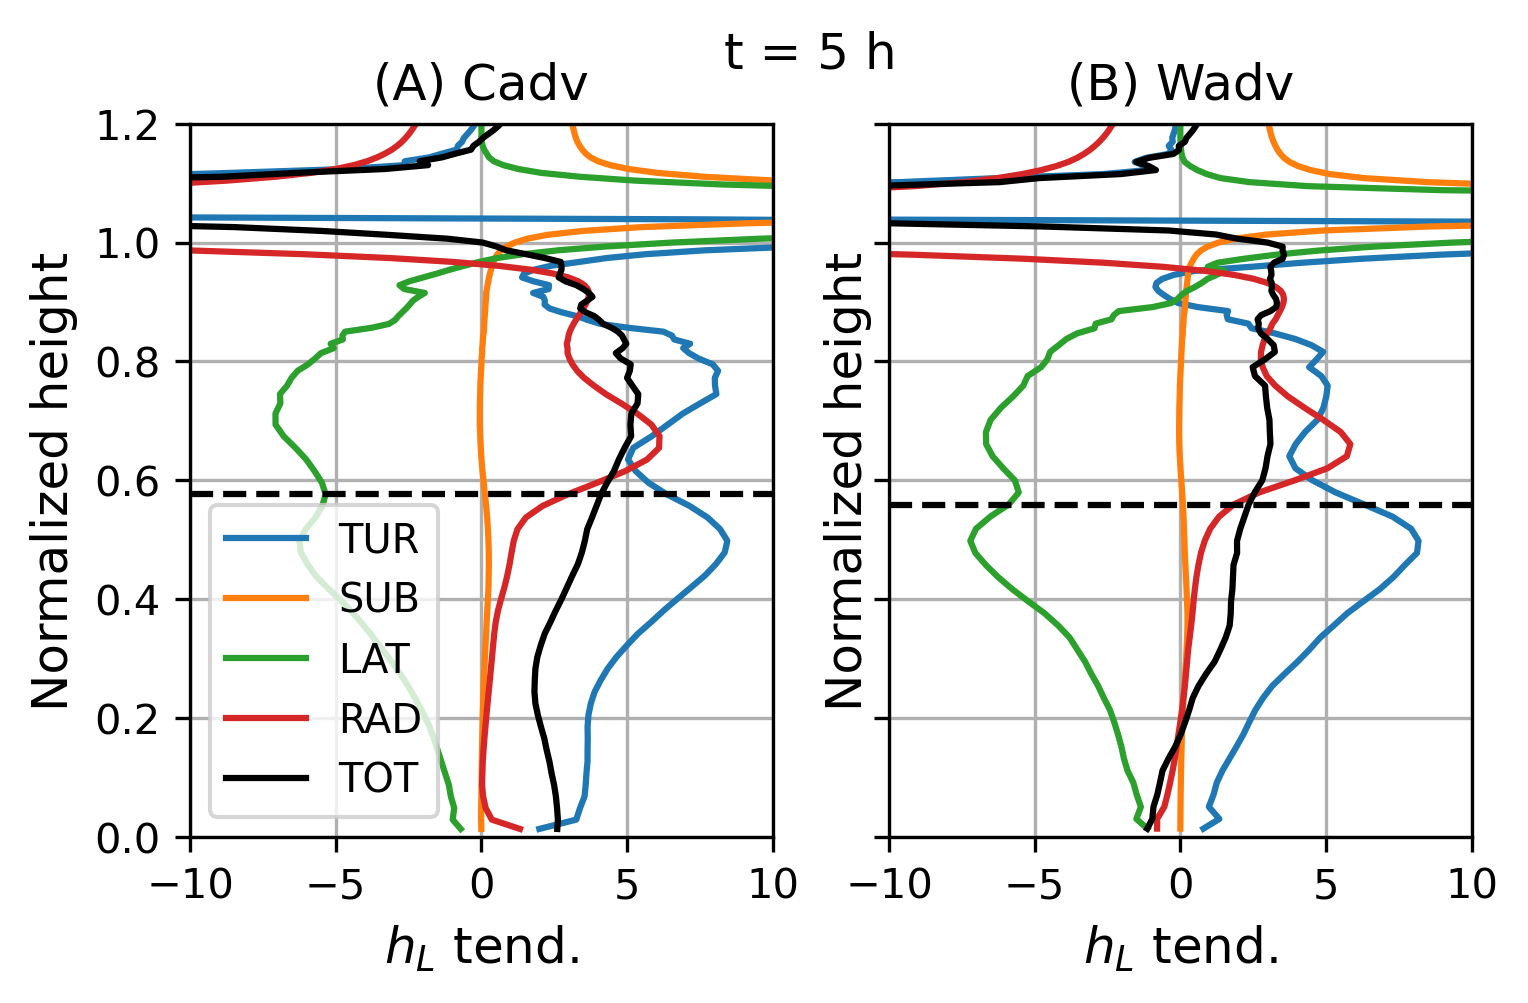

In [8]:
ind = 5
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

pltbudget(axs[0], z, (f["HLADV"][ind]) + (f["HLDIFF"][ind]),
          f["TTEND"][ind],
          f["HLLAT"][ind],
          f["HLRAD"][ind],
          f["zcb"][ind]/f["zinvb"][ind],dolegend = 1)

pltbudget(axs[1], z1, (f1["HLADV"][ind]) + (f1["HLDIFF"][ind]),
          f1["TTEND"][ind],
          f1["HLLAT"][ind],
          f1["HLRAD"][ind],
          f1["zcb"][ind]/f1["zinvb"][ind],dolegend = 0)

axs[0].set_title('(A) Cadv')
axs[1].set_title('(B) Wadv')
fig.suptitle('t = 5 h', fontsize=myfontsize)

# for i, label in enumerate(('(A) Cadv', '(B) Wadv')):
#     axs[i].text(0.65, 0.05, label, transform=axs[i].transAxes,fontsize=0.8*myfontsize, fontweight='bold')
    
# fig.savefig('plot_result_budget_temp_t=5h.png', dpi=fig.dpi, bbox_inches='tight')

Text(0.5, 0.98, 't = 5 h')

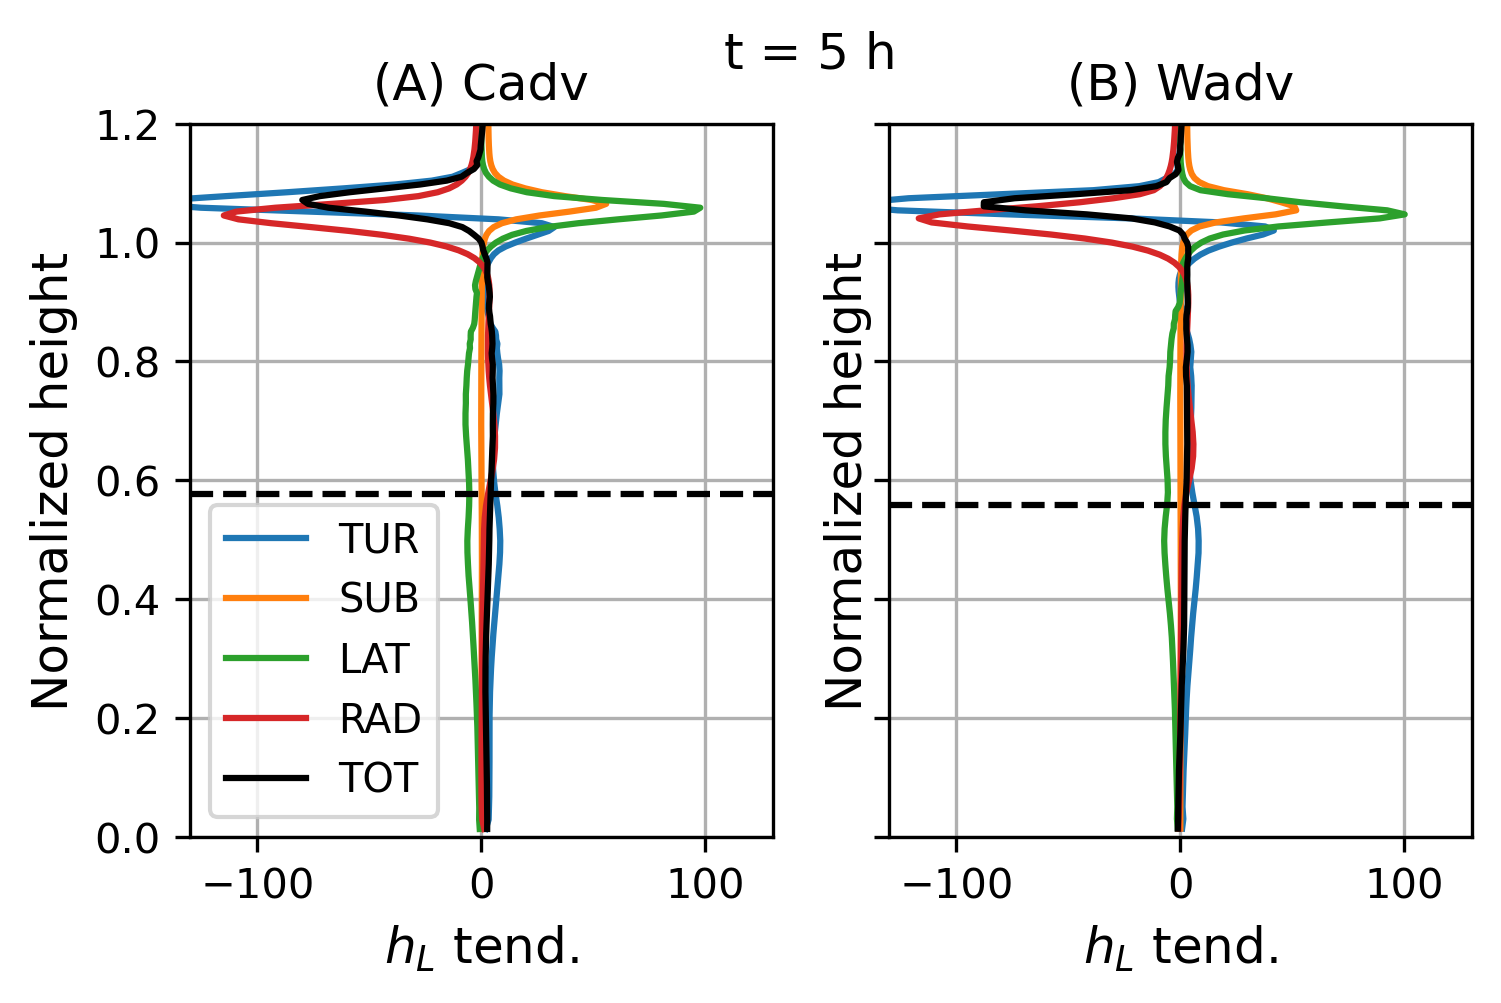

In [12]:
ind = 5
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

pltbudget(axs[0], z, (f["HLADV"][ind]) + (f["HLDIFF"][ind]),
          f["TTEND"][ind],
          f["HLLAT"][ind],
          f["HLRAD"][ind],
          f["zcb"][ind]/f["zinvb"][ind],xrange = [-130., 130], dolegend = 1)

pltbudget(axs[1], z1, (f1["HLADV"][ind]) + (f1["HLDIFF"][ind]),
          f1["TTEND"][ind],
          f1["HLLAT"][ind],
          f1["HLRAD"][ind],
          f1["zcb"][ind]/f1["zinvb"][ind],xrange = [-130., 130],dolegend = 0)

axs[0].set_title('(A) Cadv')
axs[1].set_title('(B) Wadv')
fig.suptitle('t = 5 h', fontsize=myfontsize)

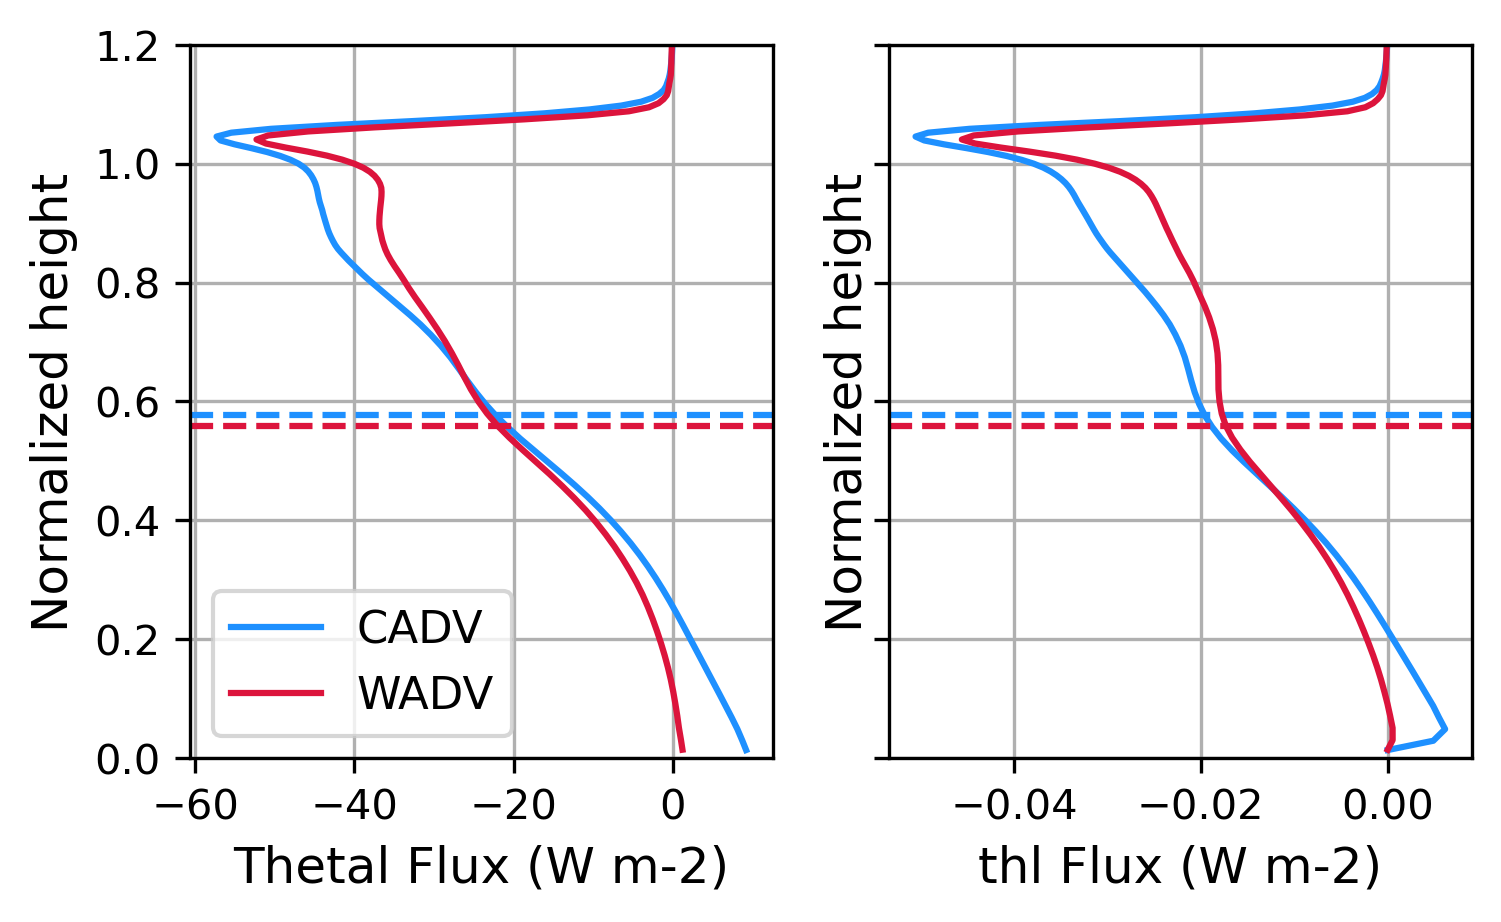

In [13]:
ind = 5
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

#
axs[0].plot(f["TLFLUX"][ind], z, label = 'CADV', color = cadvc)
setax(axs[0], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'Thetal Flux (W m-2)',
      color = cadvc)

axs[0].plot(f1["TLFLUX"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[0], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'Thetal Flux (W m-2)',
      color = wadvc)

axs[0].legend(loc="best", fontsize=0.9*myfontsize)

#
axs[1].plot(f["THLFLUX"][ind], z, label = 'CADV', color = cadvc)
setax(axs[1], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'thl Flux (W m-2)',
      color = cadvc)


axs[1].plot(f1["THLFLUX"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[1], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'thl Flux (W m-2)',
      color = wadvc)

(-10.0, 10.0)

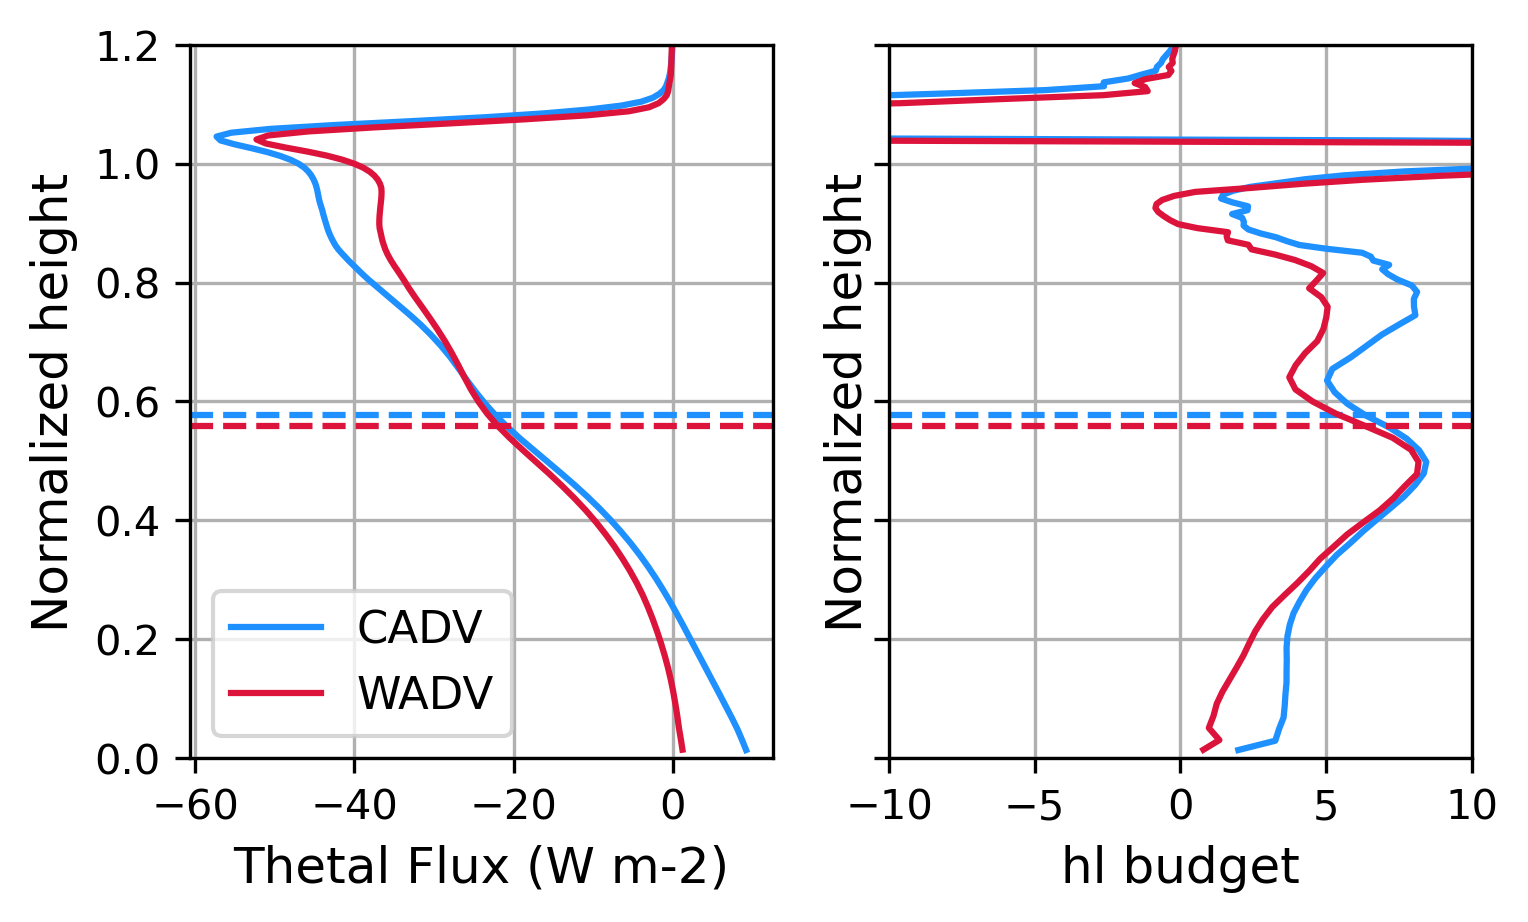

In [10]:
ind = 5
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

#
axs[0].plot(f["TLFLUX"][ind], z, label = 'CADV', color = cadvc)
setax(axs[0], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'Thetal Flux (W m-2)',
      color = cadvc)

axs[0].plot(f1["TLFLUX"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[0], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'Thetal Flux (W m-2)',
      color = wadvc)

axs[0].legend(loc="best", fontsize=0.9*myfontsize)

#
axs[1].plot(f["HLADV"][ind] + f["HLDIFF"][ind], z, label = 'CADV', color = cadvc)
setax(axs[1], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'hl budget',
      color = cadvc)

axs[1].plot(f1["HLADV"][ind] + f1["HLDIFF"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[1], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'hl budget',
      color = wadvc)

axs[1].set_xlim([-10., 10])

(-5.0, 5.0)

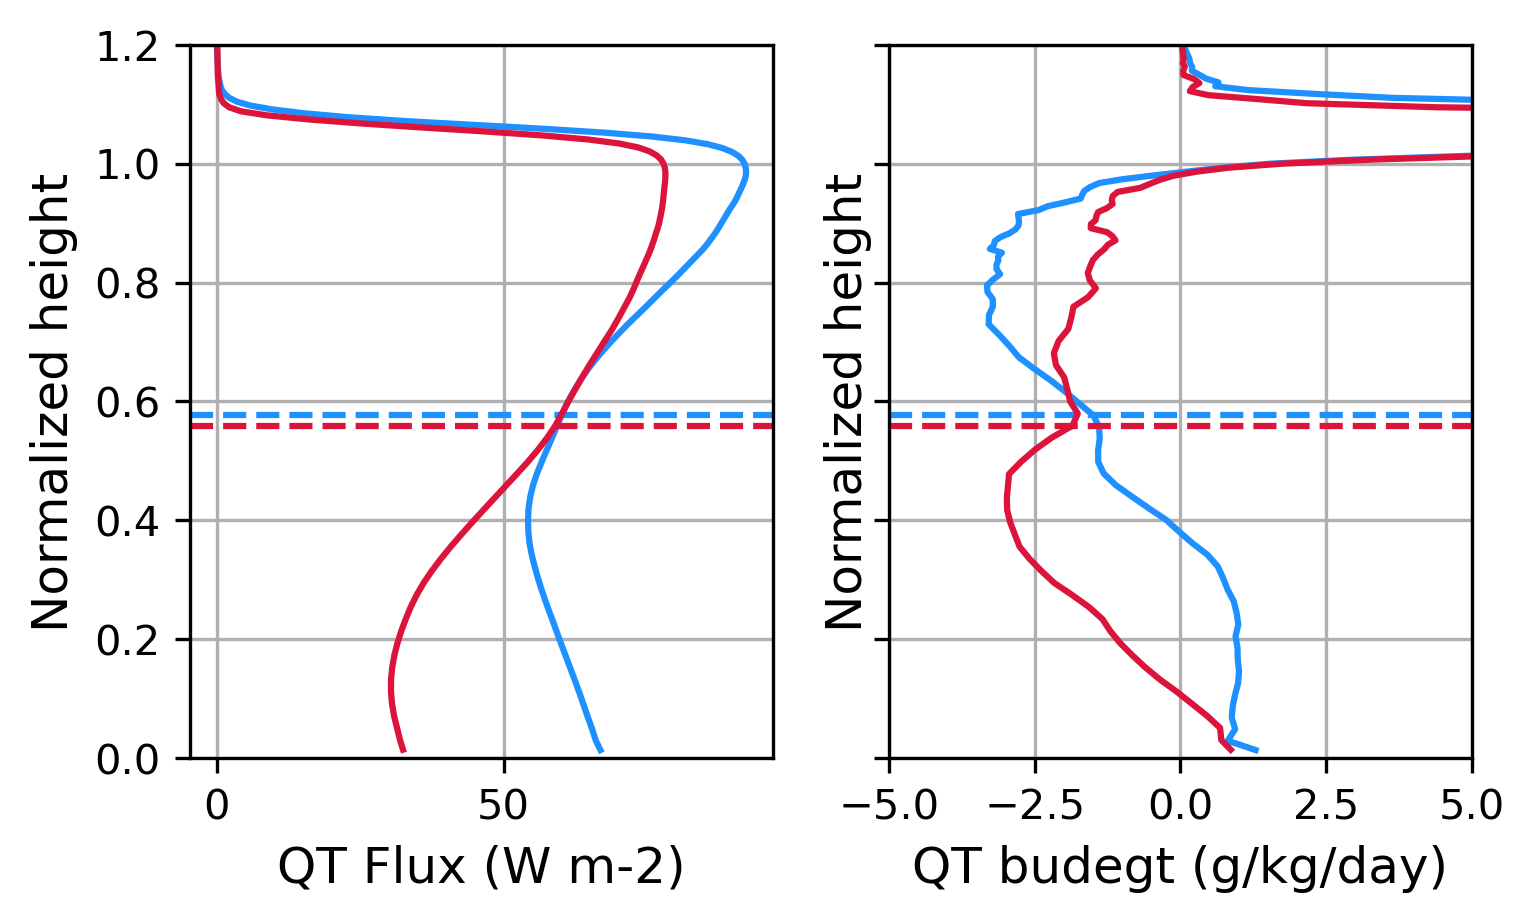

In [10]:
ind = 5
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

Lv     = 2.5104e6          # Latent heat of condensation, J/kg
qtflux = f["QTFLUX"][ind]/Lv/f['RHO'][ind] #from W/m2 -> kg/kg/m/s
qtflux = 1000.*qtflux*(24.*3600.) #from kg/kg/m/s -> g/kg/m/day
qt_tur= -(qtflux.shift(z = -1) - qtflux)/(z.shift(z = -1) - z)/1000. # g/kg/day

qtflux1 = f1["QTFLUX"][ind]/Lv/f1['RHO'][ind] #from W/m2 -> kg/kg/m/s
qtflux1 = 1000.*qtflux1*(24.*3600.) #from kg/kg/m/s -> g/kg/m/day
qt_tur1 = -(qtflux1.shift(z = -1) - qtflux1)/(z.shift(z = -1) - z)/1000. # g/kg/day

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

#
axs[0].plot(f["QTFLUX"][ind], z, label = 'CADV', color = cadvc)
setax(axs[0], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'QT Flux (W m-2)',
      color = cadvc)

axs[0].plot(f1["QTFLUX"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[0], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'QT Flux (W m-2)',
      color = wadvc)

#
axs[1].plot(qt_tur, z, label = 'CADV', color = cadvc)
setax(axs[1], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'QT budegt (g/kg/day)',
      color = cadvc)

axs[1].plot(qt_tur1, z1, label = 'WADV', color = wadvc)
setax(axs[1], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'QT budegt (g/kg/day)',
      color = wadvc)

axs[1].set_xlim([-5, 5])

Text(0.5, 0.98, 't = 5 h')

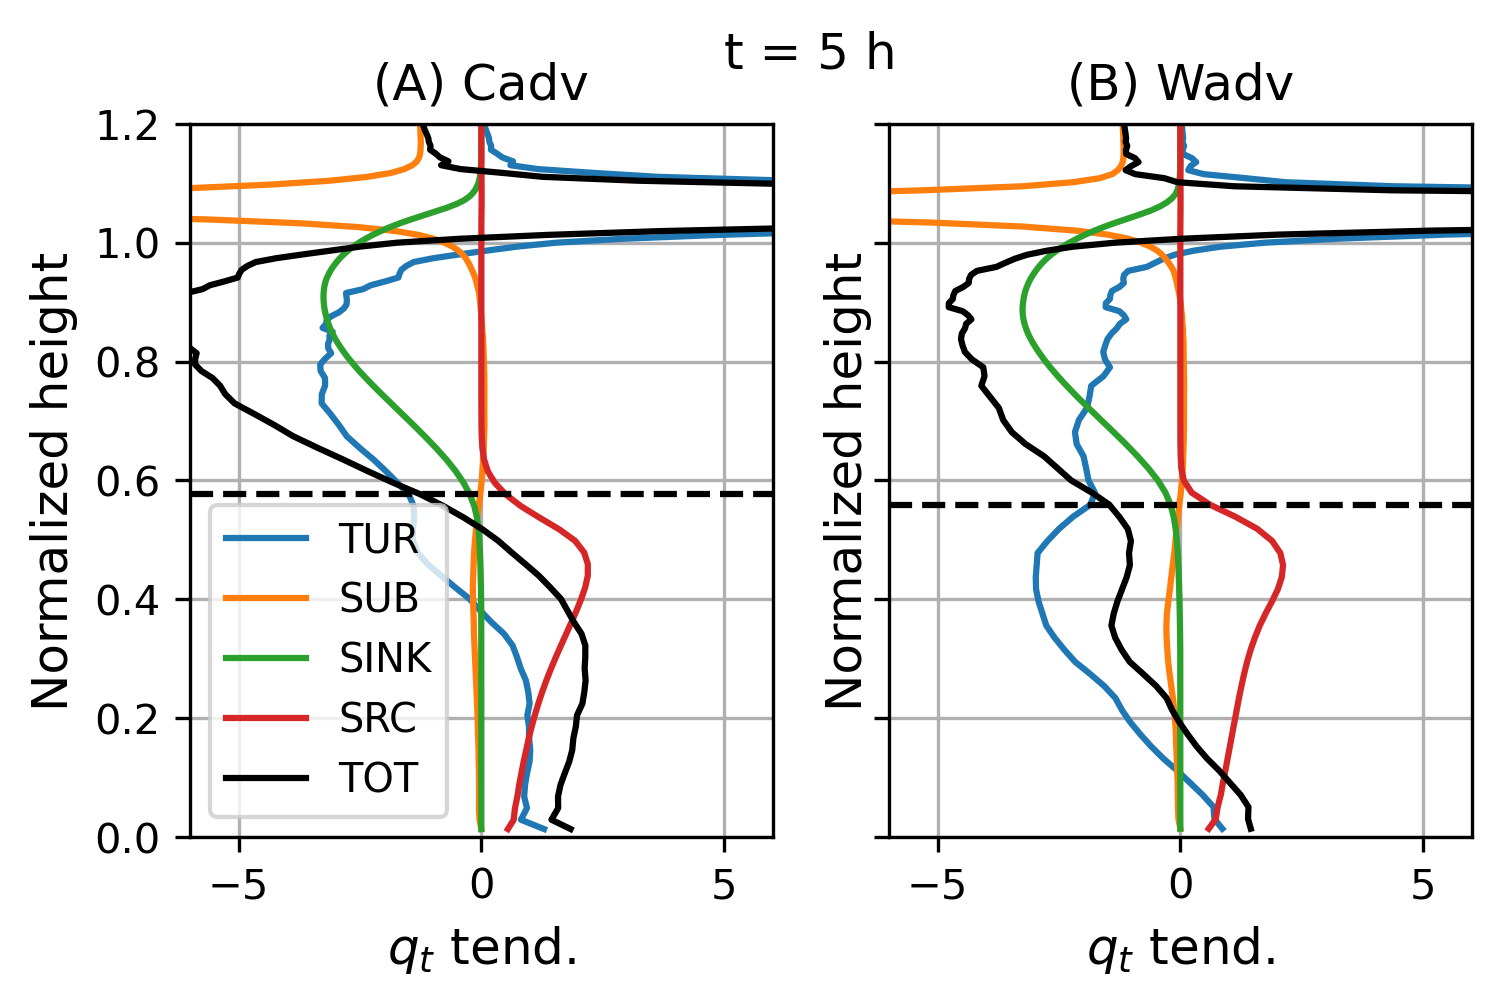

In [12]:
ind = 5
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

Lv     = 2.5104e6          # Latent heat of condensation, J/kg
qtflux = f["QTFLUX"][ind]/Lv/f['RHO'][ind] #from W/m2 -> kg/kg/m/s
qtflux = 1000.*qtflux*(24.*3600.) #from kg/kg/m/s -> g/kg/m/day
qt_tur= -(qtflux.shift(z = -1) - qtflux)/(z.shift(z = -1) - z)/1000. # g/kg/day

qtflux1 = f1["QTFLUX"][ind]/Lv/f1['RHO'][ind] #from W/m2 -> kg/kg/m/s
qtflux1 = 1000.*qtflux1*(24.*3600.) #from kg/kg/m/s -> g/kg/m/day
qt_tur1 = -(qtflux1.shift(z = -1) - qtflux1)/(z.shift(z = -1) - z)/1000. # g/kg/day

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

pltbudget(axs[0], z, qt_tur,
          f["QTEND"][ind],
          f["QTSINK"][ind],
          f["QTSRC"][ind],
          f["zcb"][ind]/f["zinvb"][ind],
          xtitle = "$q_t$ tend.",
          xrange = [-6, 6], doqt = 1)

pltbudget(axs[1], z1, qt_tur1,
          f1["QTEND"][ind],
          f1["QTSINK"][ind],
          f1["QTSRC"][ind],
          f1["zcb"][ind]/f1["zinvb"][ind],
          xtitle = "$q_t$ tend.",
          xrange = [-6, 6], doqt = 1, dolegend = 0)

axs[0].set_title('(A) Cadv')
axs[1].set_title('(B) Wadv')
fig.suptitle('t = 5 h', fontsize=myfontsize)

(0.97, 1.1)

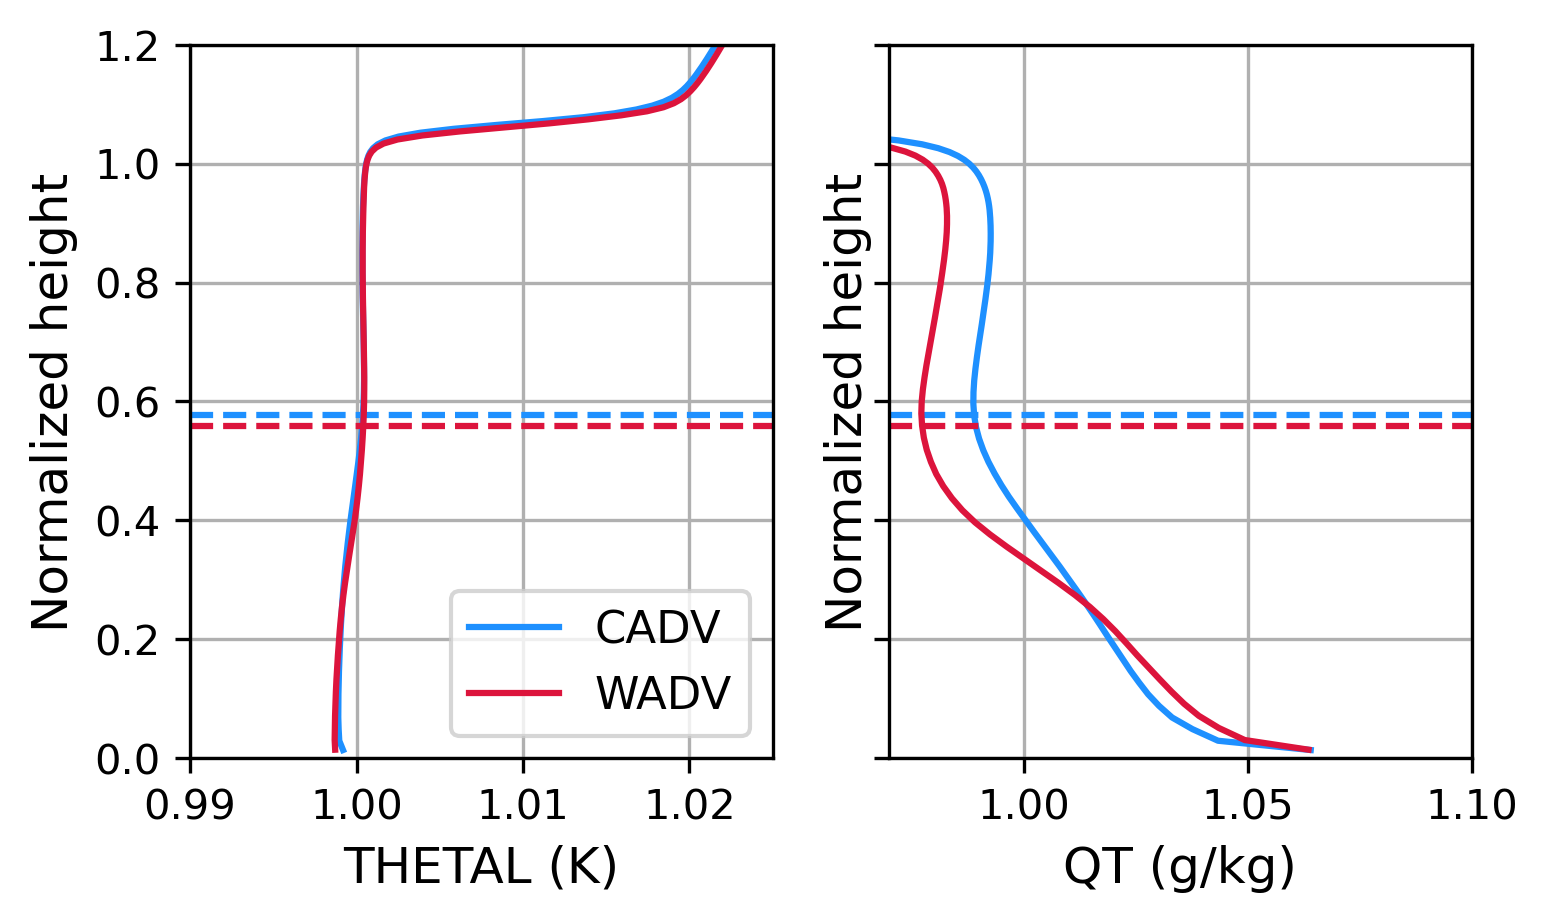

In [15]:
ind = 5
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

#
axs[0].plot(f["THETAL"][ind]/f["thl_scale"][ind], z, label = 'CADV', color = cadvc)
setax(axs[0], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'THETAL (K)',
      color = cadvc)


axs[0].plot(f1["THETAL"][ind]/f1["thl_scale"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[0], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'THETAL (K)',
      color = wadvc)

axs[0].set_xlim([0.99, 1.025])
axs[0].legend(loc="best", fontsize=0.9*myfontsize)

#
axs[1].plot(f["QT"][ind]/f["qt_scale"][ind]/1000., z, label = 'CADV', color = cadvc)
setax(axs[1], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'QT (g/kg)',
      color = cadvc)

axs[1].plot(f1["QT"][ind]/f["qt_scale"][ind]/1000., z1, label = 'WADV', color = wadvc)
setax(axs[1], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'QT (g/kg)',
      color = wadvc)

axs[1].set_xlim([0.97, 1.1])

In [17]:
def pltbudget_w2(ax, z, buoy, diff, adv, pres, redis, zcb,
              xtitle = "$W2$ tend.",
              xrange = [-0.001, 0.001],
              dolegend = 1):
    
    ax.plot(buoy, z, label = 'BUOY')
    ax.plot(diff, z, label = 'DIFF')
    ax.plot(adv, z, label = 'ADV')
    ax.plot(pres, z, label = 'PRES')
    ax.plot(redis, z, label = 'REDIS')  
    ax.plot(buoy+diff+adv+pres+redis, z, label = 'TOT', color = 'black')

    ax.axhline(y=zcb, linestyle='--',color = 'black')

    ax.set_xlabel(xtitle, fontsize=myfontsize)    
    ax.set_ylabel("Normalized height", fontsize=myfontsize) 
    ax.set_ylim([0., 1.2])
    ax.set_xlim(xrange)
    ax.grid(True)
    
    if dolegend == 1:
        ax.legend(loc="upper left", fontsize=0.6*myfontsize)

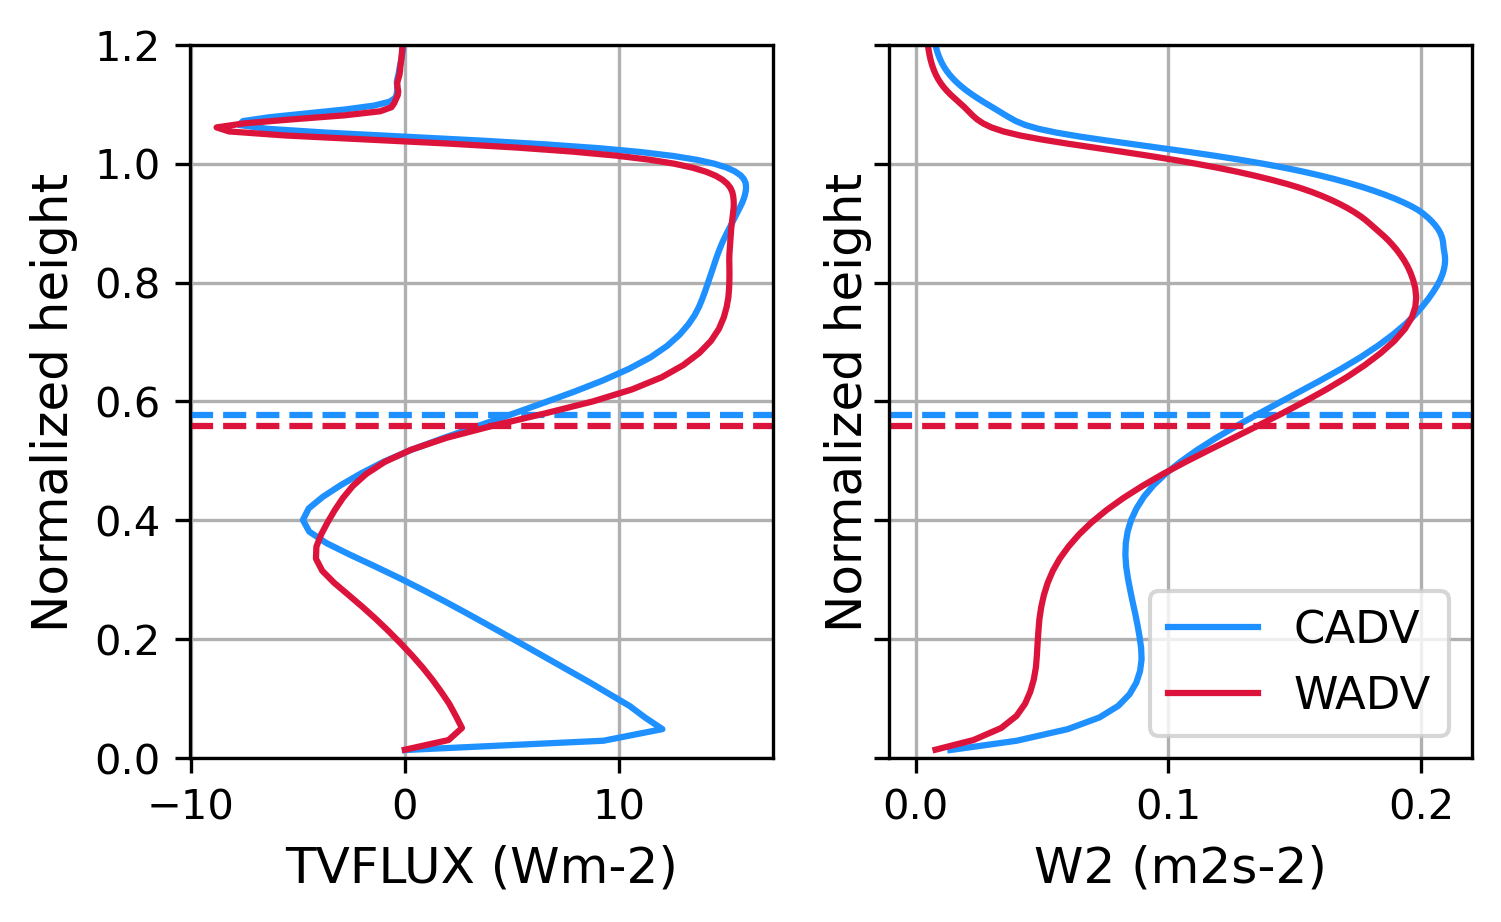

In [7]:
ind = 5
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

#
axs[0].plot(f["TVFLUX"][ind], z, label = 'CADV', color = cadvc)
setax(axs[0], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'TVFLUX (Wm-2)',
      color = cadvc)

axs[0].plot(f1["TVFLUX"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[0], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'TVFLUX (Wm-2)',
      color = wadvc)

# axs[0].legend(loc="best", fontsize=0.9*myfontsize)

#
axs[1].plot(f["W2"][ind], z, label = 'CADV', color = cadvc)
setax(axs[1], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'W2 (m2s-2)',
      color = cadvc)

axs[1].plot(f1["W2"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[1], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'W2 (m2s-2)',
      color = wadvc)

axs[1].legend(loc="best", fontsize=0.9*myfontsize)

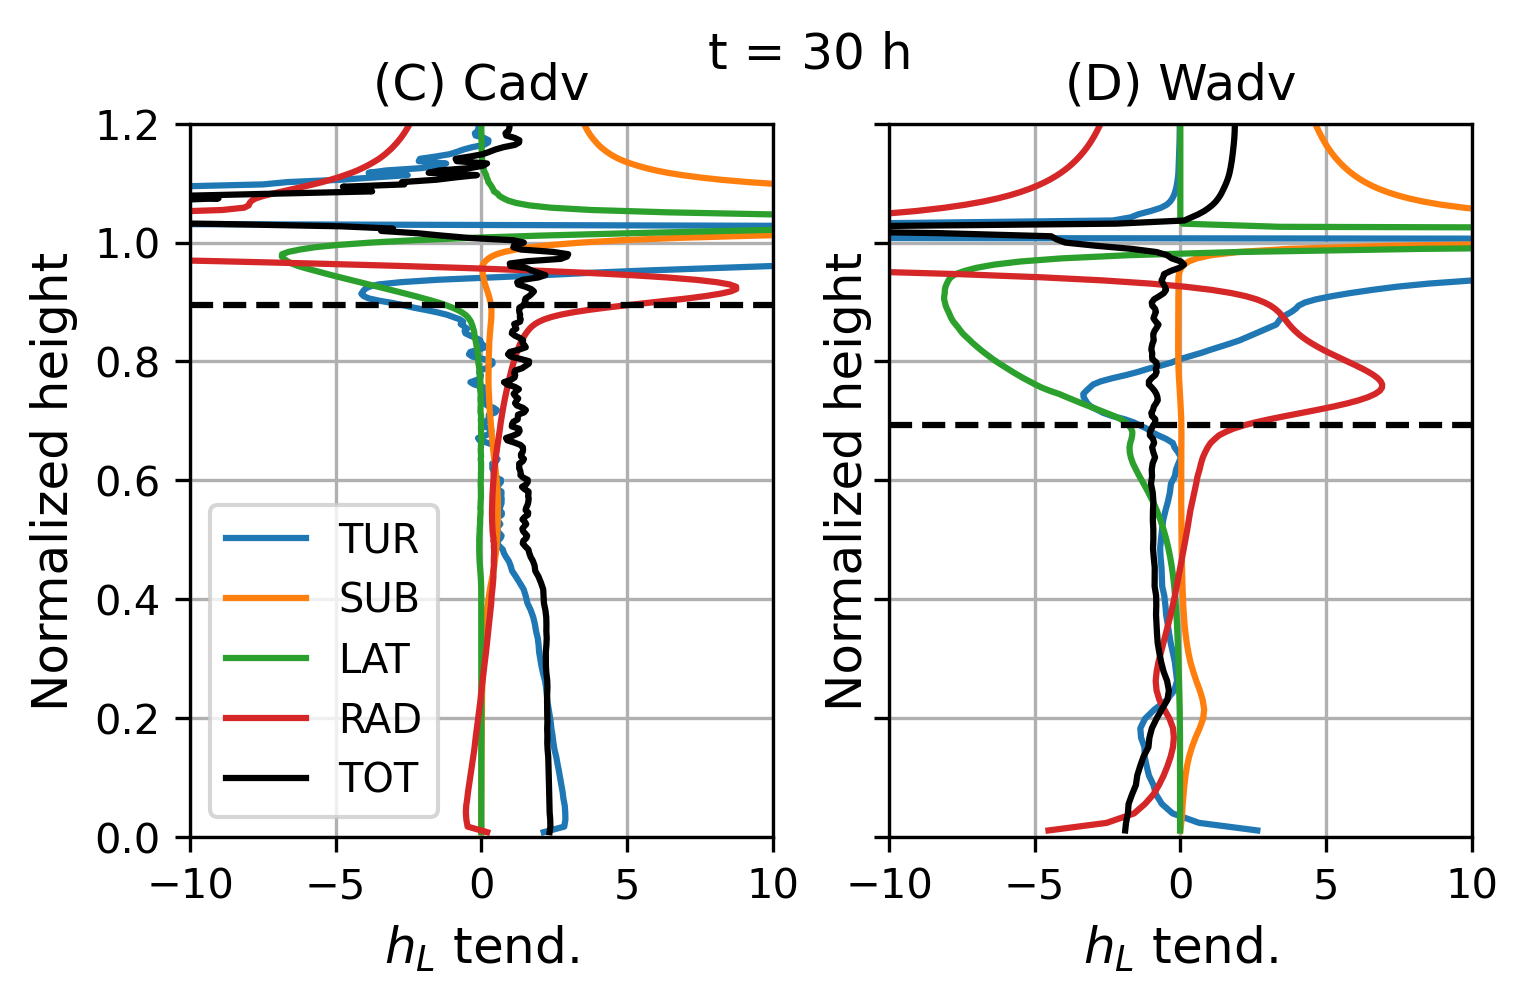

In [37]:
ind = 30
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

pltbudget(axs[0], z, (f["HLADV"][ind]) + (f["HLDIFF"][ind]),
          f["TTEND"][ind],
          f["HLLAT"][ind],
          f["HLRAD"][ind],
          f["zcb"][ind]/f["zinvb"][ind],dolegend = 1)

pltbudget(axs[1], z1, (f1["HLADV"][ind]) + (f1["HLDIFF"][ind]),
          f1["TTEND"][ind],
          f1["HLLAT"][ind],
          f1["HLRAD"][ind],
          f1["zcb"][ind]/f1["zinvb"][ind],dolegend = 0)

axs[0].set_title('(C) Cadv')
axs[1].set_title('(D) Wadv')
fig.suptitle('t = 30 h', fontsize=myfontsize)

# fig.savefig('plot_result_budget_temp_t=30h.png', dpi=fig.dpi, bbox_inches='tight')

# for i, label in enumerate(('(A) Cadv', '(B) Wadv')):
#     axs[i].text(-0.02, 1.05, label, transform=axs[i].transAxes,fontsize=myfontsize, fontweight='bold')

Text(0.5, 0.98, 't = 30 h')

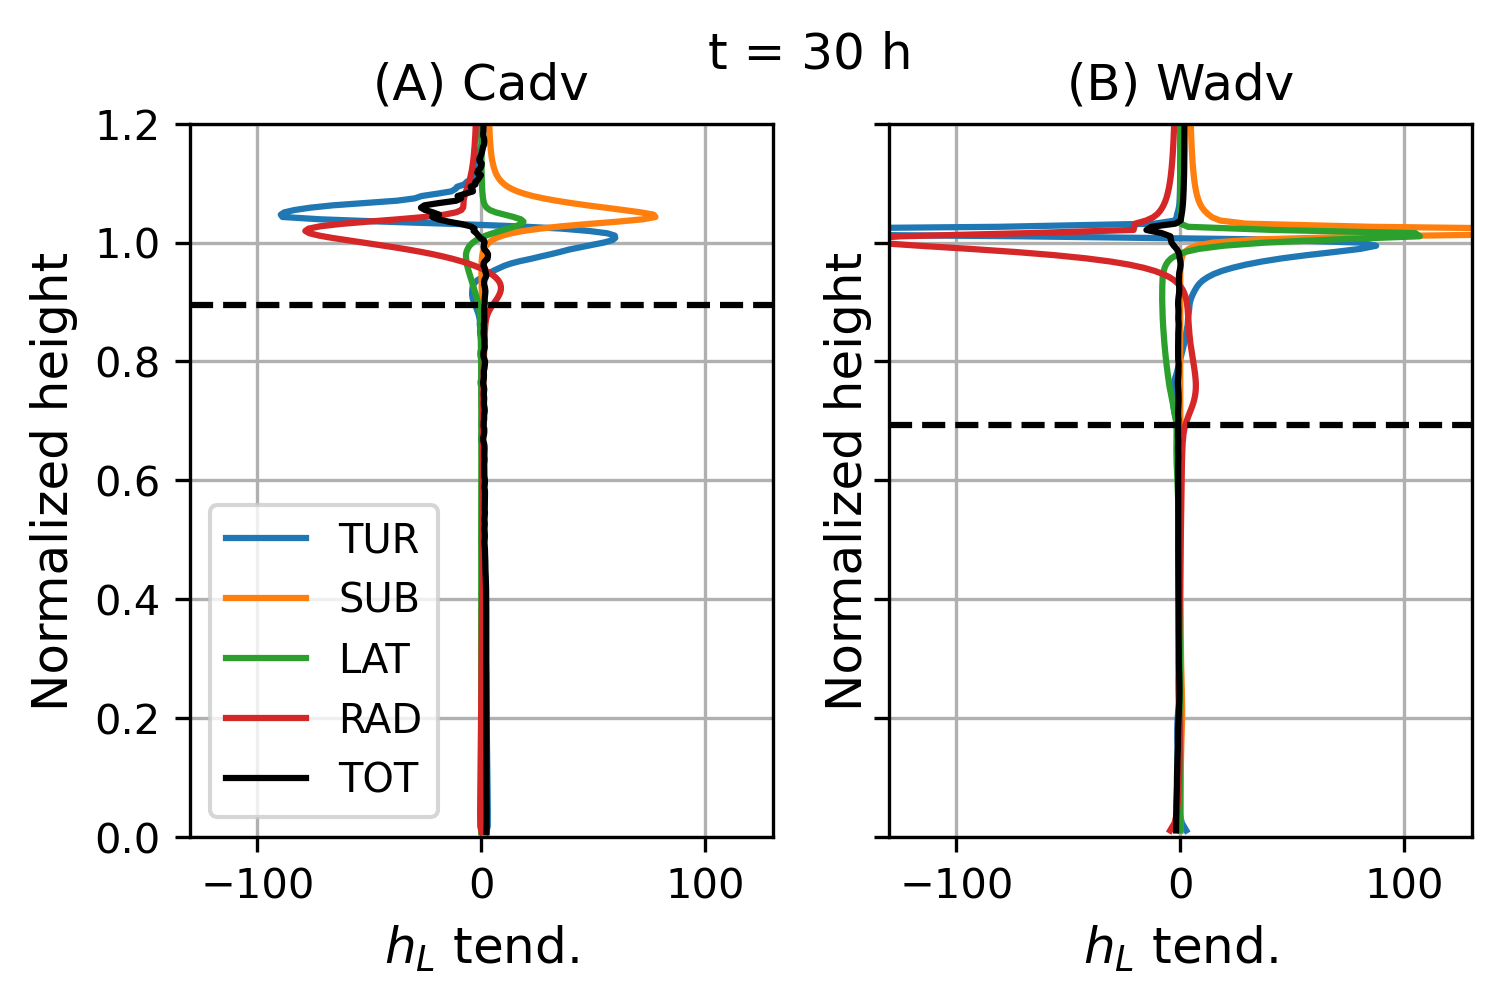

In [13]:
ind = 30
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

pltbudget(axs[0], z, (f["HLADV"][ind]) + (f["HLDIFF"][ind]),
          f["TTEND"][ind],
          f["HLLAT"][ind],
          f["HLRAD"][ind],
          f["zcb"][ind]/f["zinvb"][ind],xrange = [-130., 130], dolegend = 1)

pltbudget(axs[1], z1, (f1["HLADV"][ind]) + (f1["HLDIFF"][ind]),
          f1["TTEND"][ind],
          f1["HLLAT"][ind],
          f1["HLRAD"][ind],
          f1["zcb"][ind]/f1["zinvb"][ind],xrange = [-130., 130],dolegend = 0)

axs[0].set_title('(A) Cadv')
axs[1].set_title('(B) Wadv')
fig.suptitle('t = 30 h', fontsize=myfontsize)

(-10.0, 10.0)

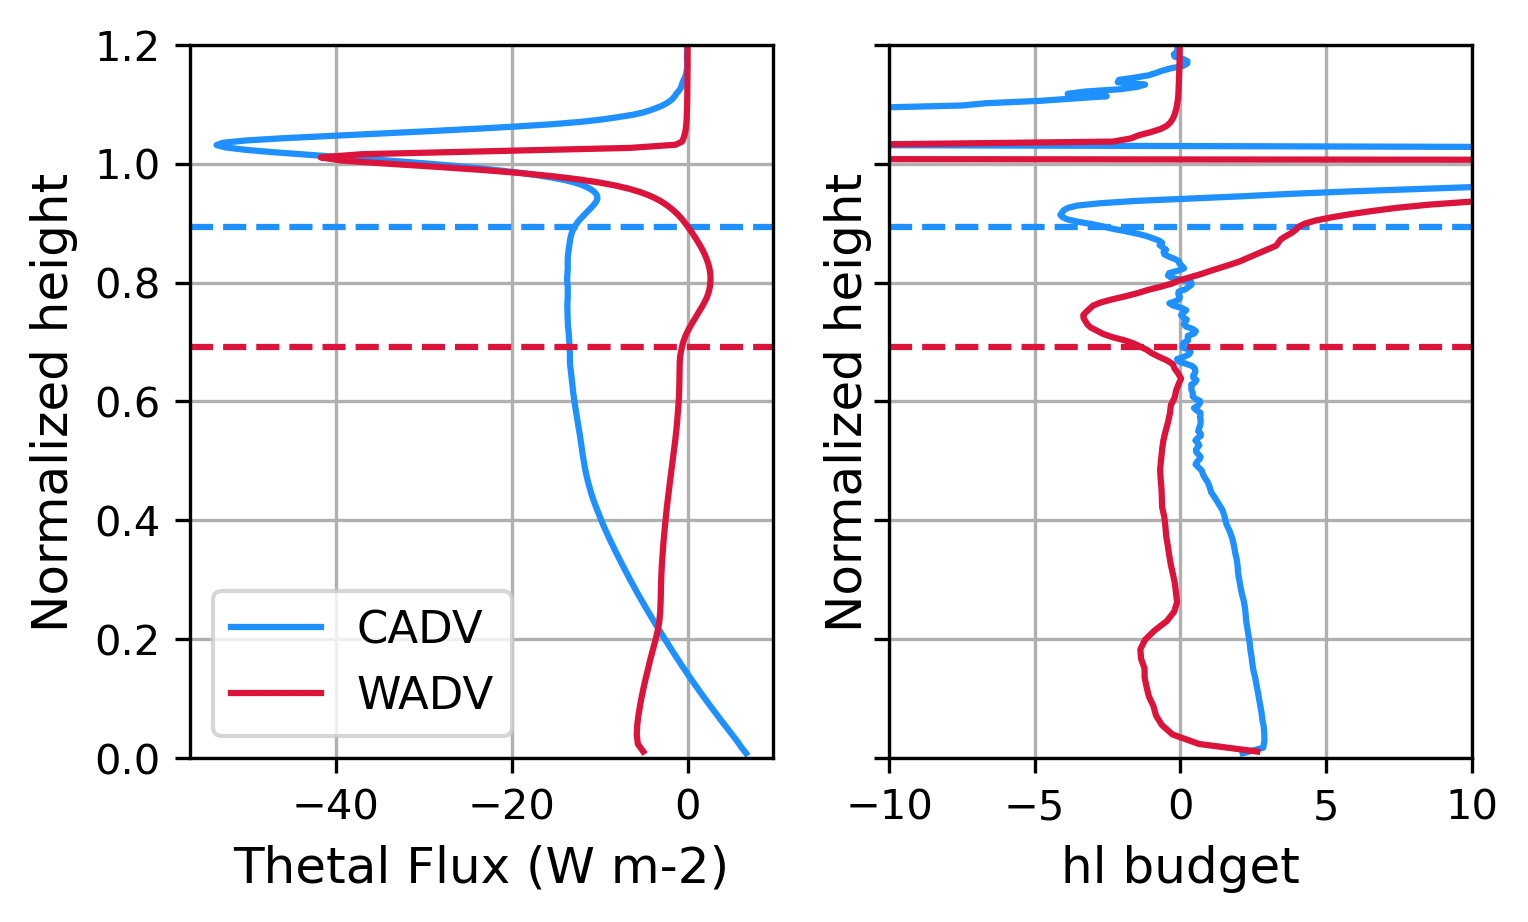

In [7]:
ind = 30
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

#
axs[0].plot(f["TLFLUX"][ind], z, label = 'CADV', color = cadvc)
setax(axs[0], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'Thetal Flux (W m-2)',
      color = cadvc)

axs[0].plot(f1["TLFLUX"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[0], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'Thetal Flux (W m-2)',
      color = wadvc)

axs[0].legend(loc="best", fontsize=0.9*myfontsize)

#
axs[1].plot(f["HLADV"][ind] + f["HLDIFF"][ind], z, label = 'CADV', color = cadvc)
setax(axs[1], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'hl budget',
      color = cadvc)

axs[1].plot(f1["HLADV"][ind] + f1["HLDIFF"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[1], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'hl budget',
      color = wadvc)

axs[1].set_xlim([-10., 10])

(-5.0, 5.0)

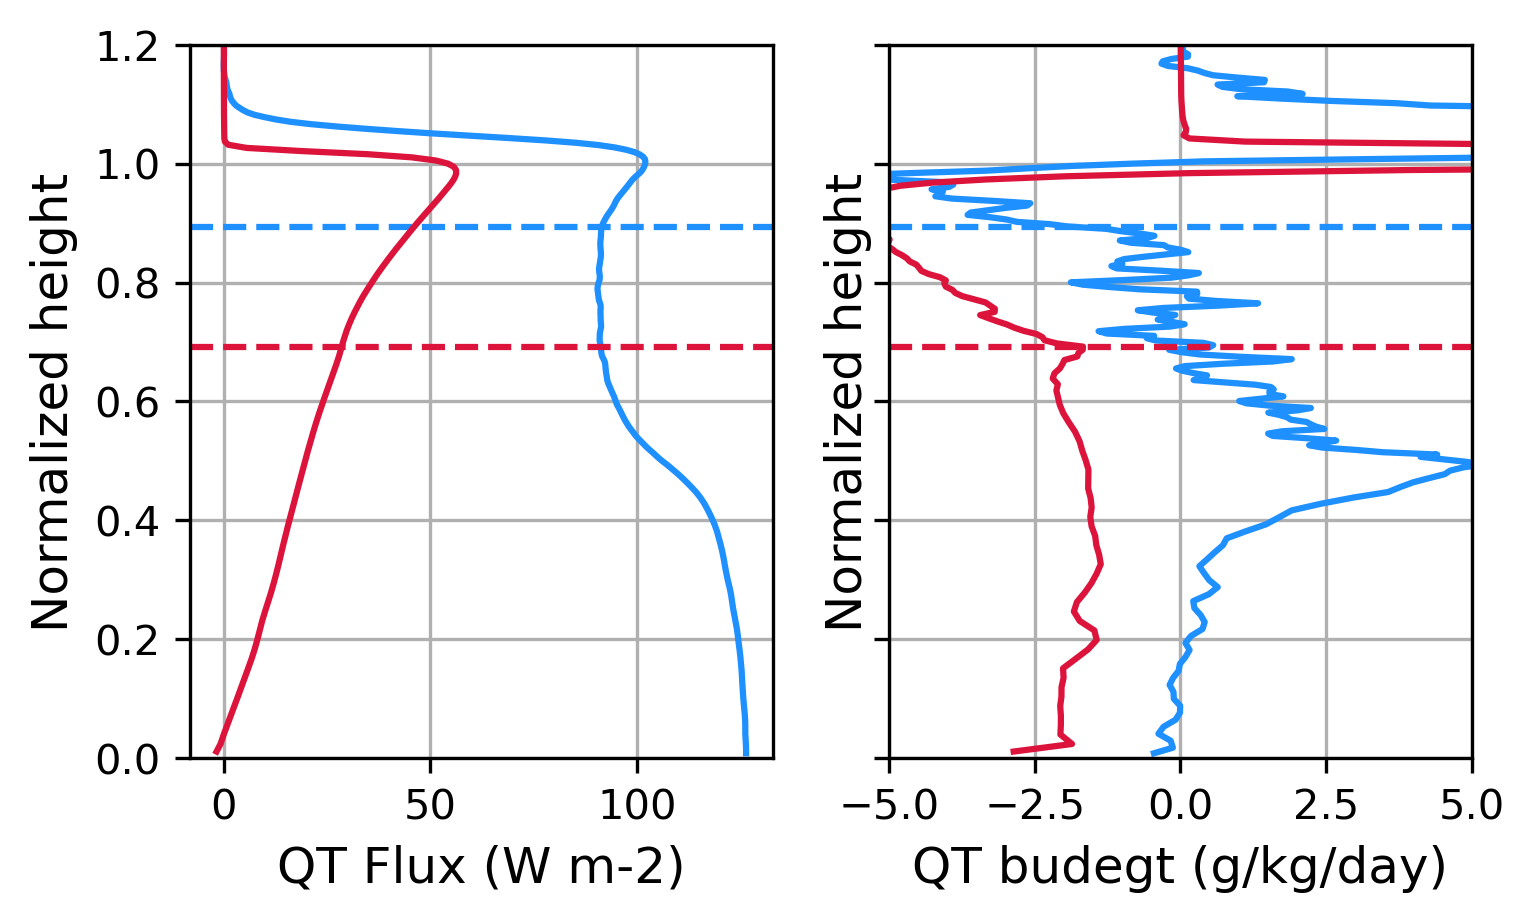

In [8]:
ind = 30
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

Lv     = 2.5104e6          # Latent heat of condensation, J/kg
qtflux = f["QTFLUX"][ind]/Lv/f['RHO'][ind] #from W/m2 -> kg/kg/m/s
qtflux = 1000.*qtflux*(24.*3600.) #from kg/kg/m/s -> g/kg/m/day
qt_tur= -(qtflux.shift(z = -1) - qtflux)/(z.shift(z = -1) - z)/1000. # g/kg/day

qtflux1 = f1["QTFLUX"][ind]/Lv/f1['RHO'][ind] #from W/m2 -> kg/kg/m/s
qtflux1 = 1000.*qtflux1*(24.*3600.) #from kg/kg/m/s -> g/kg/m/day
qt_tur1 = -(qtflux1.shift(z = -1) - qtflux1)/(z.shift(z = -1) - z)/1000. # g/kg/day

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

#
axs[0].plot(f["QTFLUX"][ind], z, label = 'CADV', color = cadvc)
setax(axs[0], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'QT Flux (W m-2)',
      color = cadvc)

axs[0].plot(f1["QTFLUX"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[0], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'QT Flux (W m-2)',
      color = wadvc)

#
axs[1].plot(qt_tur, z, label = 'CADV', color = cadvc)
setax(axs[1], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'QT budegt (g/kg/day)',
      color = cadvc)

axs[1].plot(qt_tur1, z1, label = 'WADV', color = wadvc)
setax(axs[1], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'QT budegt (g/kg/day)',
      color = wadvc)

axs[1].set_xlim([-5, 5])

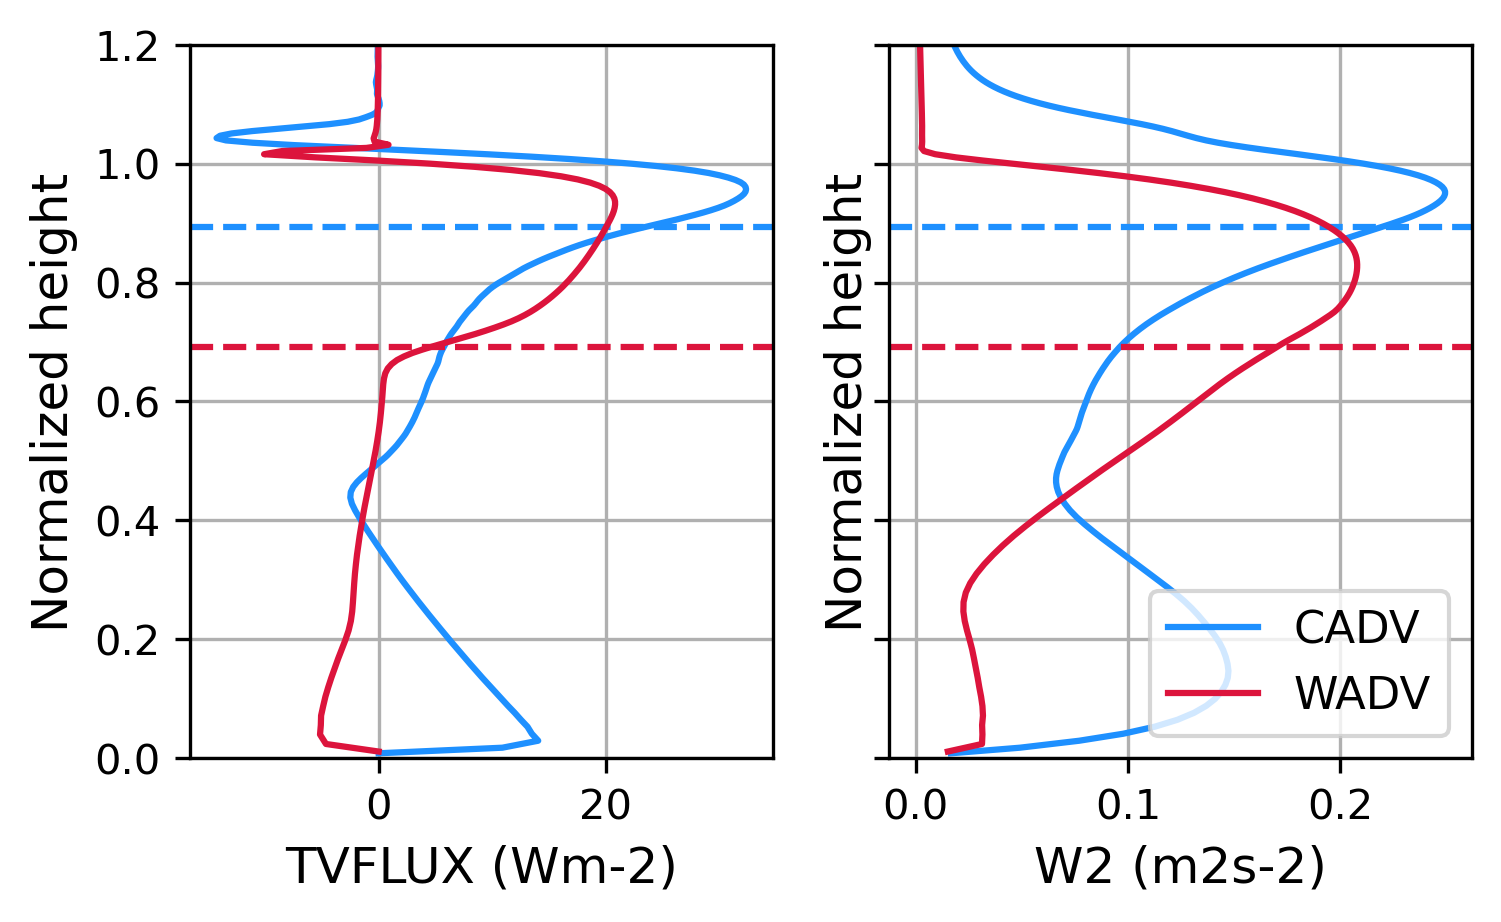

In [9]:
ind = 30
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

#
axs[0].plot(f["TVFLUX"][ind], z, label = 'CADV', color = cadvc)
setax(axs[0], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'TVFLUX (Wm-2)',
      color = cadvc)

axs[0].plot(f1["TVFLUX"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[0], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'TVFLUX (Wm-2)',
      color = wadvc)

# axs[0].legend(loc="best", fontsize=0.9*myfontsize)

#
axs[1].plot(f["W2"][ind], z, label = 'CADV', color = cadvc)
setax(axs[1], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'W2 (m2s-2)',
      color = cadvc)

axs[1].plot(f1["W2"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[1], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'W2 (m2s-2)',
      color = wadvc)

axs[1].legend(loc="best", fontsize=0.9*myfontsize)

Text(0.5, 0.98, 't = 30 h')

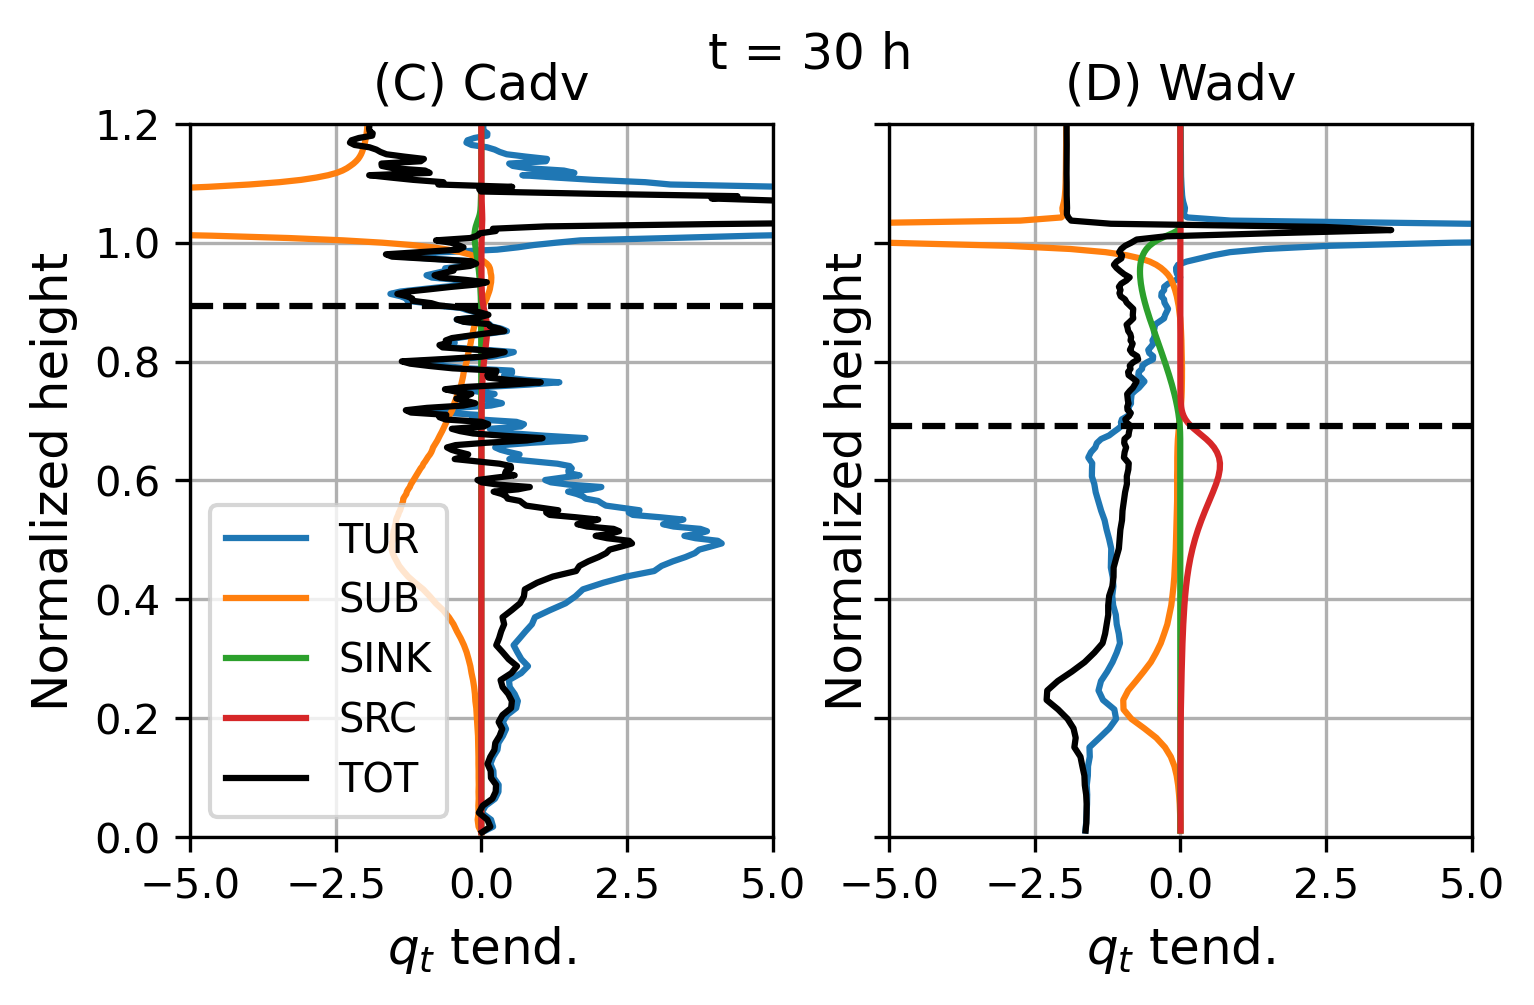

In [6]:
ind = 30
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = True, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

pltbudget(axs[0], z, (f["QTADV"][ind]) + (f["QTDIFF"][ind]),
          f["QTEND"][ind],
          f["QTSINK"][ind],
          f["QTSRC"][ind],
          f["zcb"][ind]/f["zinvb"][ind],
          xtitle = "$q_t$ tend.",
          xrange = [-5, 5], doqt = 1)

pltbudget(axs[1], z1, (f1["QTADV"][ind]) + (f1["QTDIFF"][ind]),
          f1["QTEND"][ind],
          f1["QTSINK"][ind],
          f1["QTSRC"][ind],
          f1["zcb"][ind]/f1["zinvb"][ind],
          xtitle = "$q_t$ tend.",
          xrange = [-5, 5], doqt = 1, dolegend = 0)

axs[0].set_title('(C) Cadv')
axs[1].set_title('(D) Wadv')
fig.suptitle('t = 30 h', fontsize=myfontsize)
    
# fig.savefig('plot_result_budget_qt.png', dpi=fig.dpi, bbox_inches='tight')

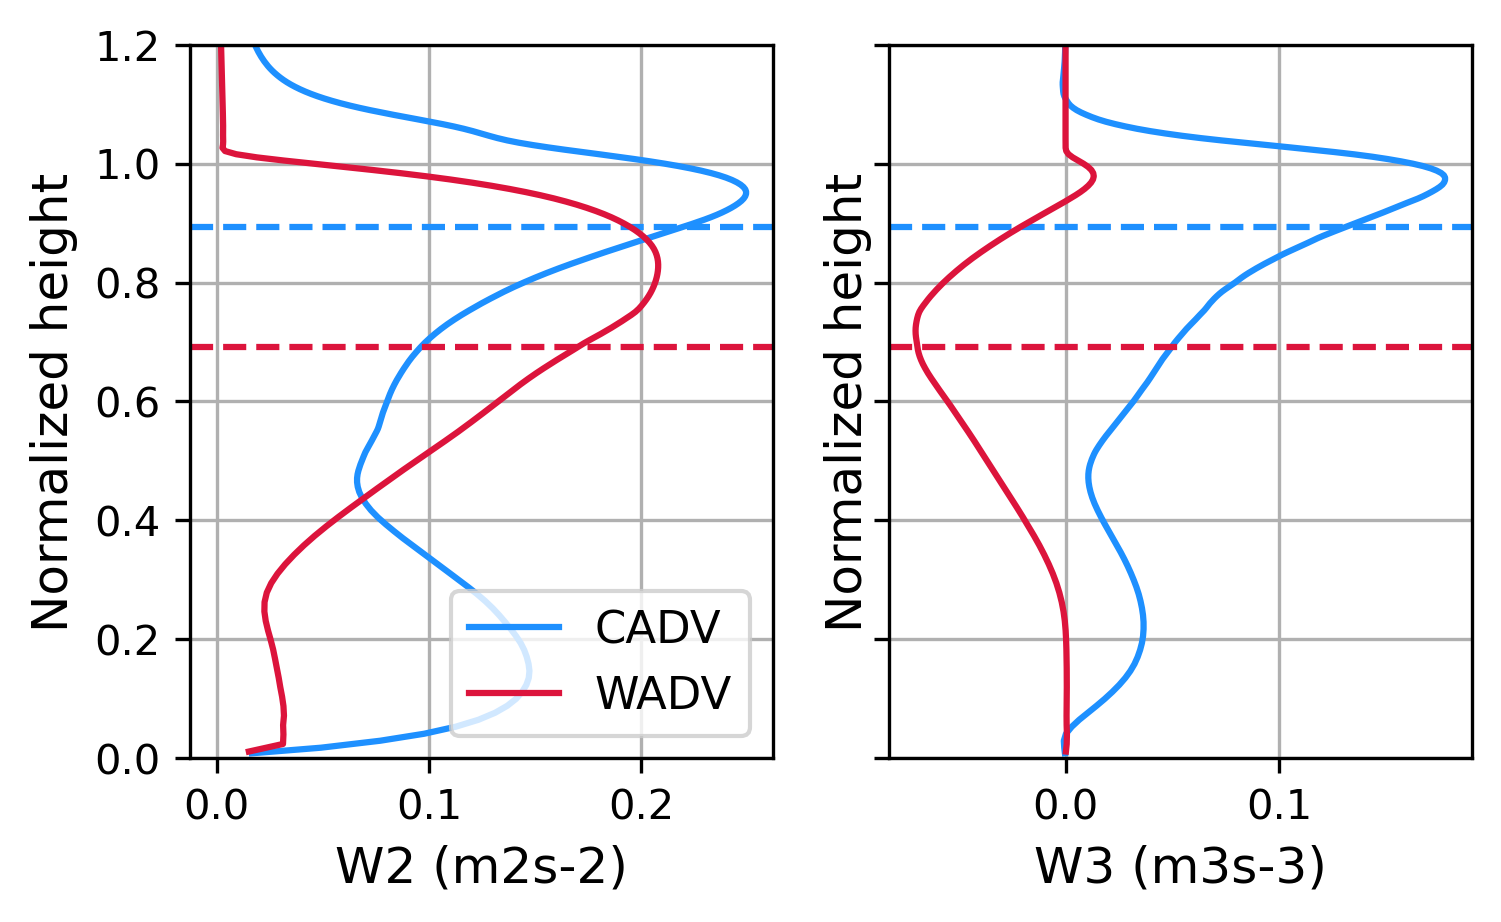

In [7]:
ind = 30
z = f['z']/f['zinvb'][ind]
z1 = f1['z']/f1['zinvb'][ind]

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (8)/2.54), dpi = 300)

#
axs[0].plot(f["W2"][ind], z, label = 'CADV', color = cadvc)
setax(axs[0], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'W2 (m2s-2)',
      color = cadvc)

axs[0].plot(f1["W2"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[0], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'W2 (m2s-2)',
      color = wadvc)

axs[0].legend(loc="best", fontsize=0.9*myfontsize)

#
axs[1].plot(f["W3"][ind], z, label = 'CADV', color = cadvc)
setax(axs[1], f["zcb"][ind]/f["zinvb"][ind],
      xtitle = 'W3 (m3s-3)',
      color = cadvc)

axs[1].plot(f1["W3"][ind], z1, label = 'WADV', color = wadvc)
setax(axs[1], f1["zcb"][ind]/f1["zinvb"][ind],
      xtitle = 'W3 (m3s-3)',
      color = wadvc)